In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

## Importing audio 
Importing audio by the librosa library, it returns:
 - signal:it is a numpy array that represents the signal amplitude for all the samples collected 
 - sr = sample rate: defines how many samples are collected per second

In [2]:
# audio file path
file = "audios/perfect_part.wav"
signal, sr = librosa.load(file, sr = 22050)

## Waveform
It is a **air pressure** zones representation \
Brings information about time and amplitude, but nothing on frequencies! 

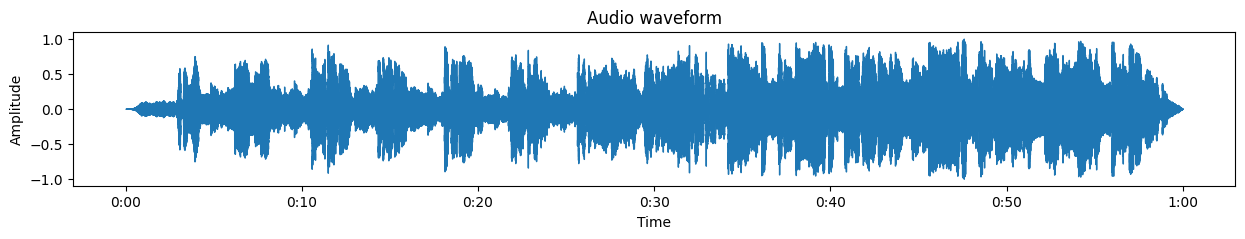

In [3]:
fig = plt.figure(figsize=(15,2))
librosa.display.waveshow(signal, sr = 22050)
plt.title("Song waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

## Spectrum
The spectrum is build by apllying **Fourrier Transform (FT)** to the audio signal. The FT will break down the sound into waves that oscillate at different frequencies.\
It manages to find out which waves (and which frequencies) that sound is made of.

The **fast Fourier transform (FFT)** is an algorithm that can efficiently compute the Fourier transform. It is widely used in signal processing.

**GOOD**: brings information about frequencies and its magnitude\
**BAD**: nothing on time.

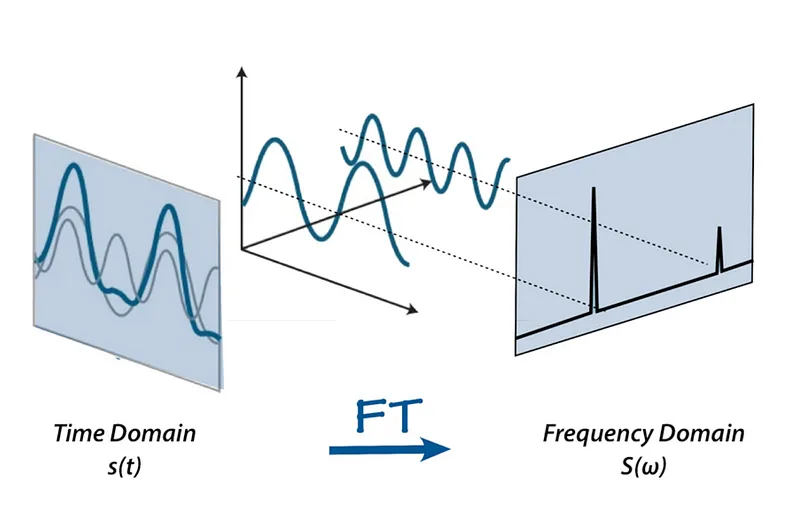

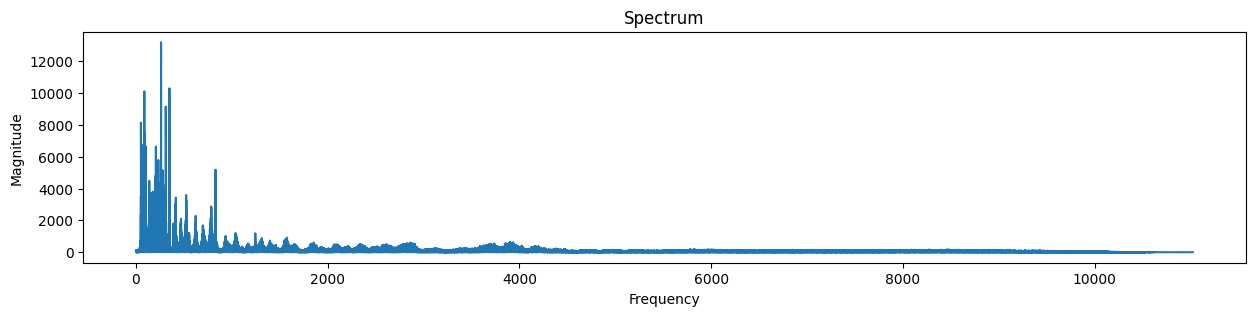

In [12]:
# ====== SPECTRUM ======
# apply fourier transform
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0,sr, len(magnitude))

#specify only half of spectrum
left_magnitude = magnitude[ : int(len(frequency)/2)]
left_frequency = frequency[ : int(len(frequency)/2)]

#plot
fig = plt.figure(figsize=(15,3))
plt.plot(left_frequency, left_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


## Spectogram 
In order to get information about time and frequencies in the same representation, the **Short Time Fourrier Transform (STFT)** was created.\
instead of using the transform in all the audio at once, it is possible to use it in audio segments at a time and thus obtain the frequencies for that time. So the FFT is computed on overlapping windowed segments of the signal.

**Parameters:**
- **signal**: numpy array with audio amplitudes
- **n_fft**: defines the windows size (amount of samples) in wicht the STFT will be applied
- **hop_length**: how much the window slides each time

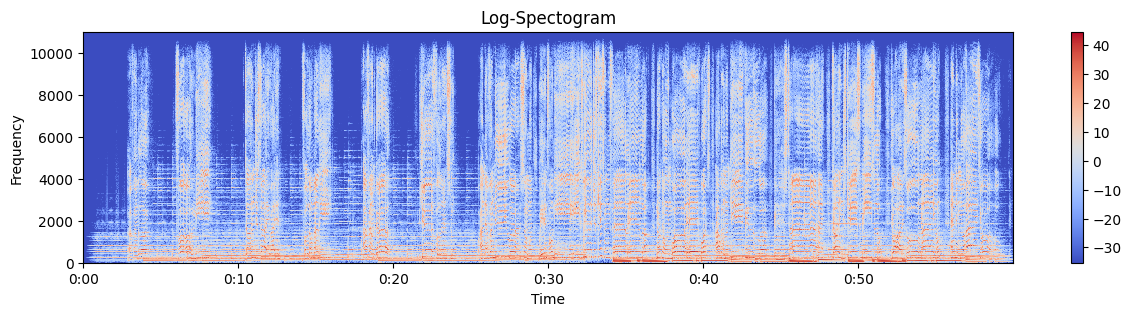

In [30]:
# ====== SPECTROGRAM ======
n_fft = 2048  # defines the windows size (amount of samples) in wicht the STFT will be applied
hop_length = 512  # how much the window slides each time

#apply short time fourier transform to each window of samples
stft = librosa.core.stft( signal, hop_length=hop_length, n_fft=n_fft)
spectogram = np.abs(stft)

# convert amplitude to decibels trhough log function necessary to visualization
log_spectogram = librosa.amplitude_to_db(spectogram)

#plot
fig = plt.figure(figsize=(15,3))
librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length, 
                         x_axis = "time",
                         y_axis="linear")
plt.title("Log-Spectogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.show()


## Mel-Spectogram 
Studies have shown that humans do not perceive frequencies on a linear scale. We are better at detecting differences in lower frequencies than higher frequencies. \
Because of that the **Mel-scale** was created and propose a unit of pitch that equal distances in pitch sounded equally distant to the listener.

A mel-spectogram is a spectogram where the frequencies are converted to the mel-scale.

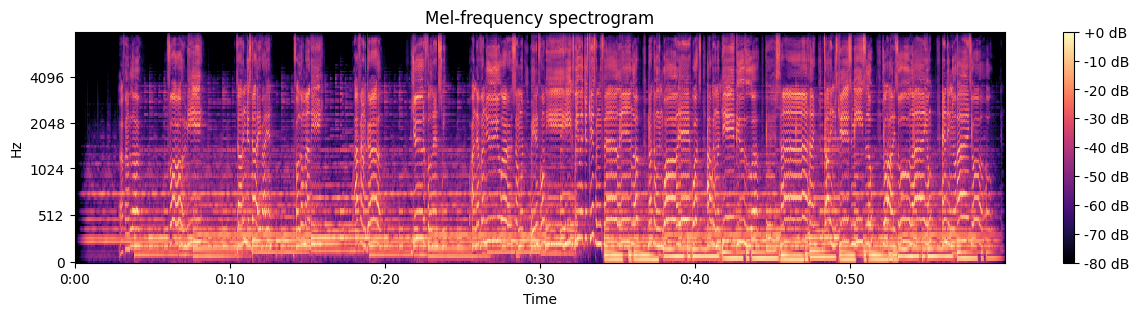

In [20]:
S = librosa.feature.melspectrogram(y=signal, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)

# plot
fig = plt.figure(figsize=(15,3))
librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000)
plt.title('Mel-frequency spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


# Mel Frequency Ceptral Coefficients (MFCCs)
**Capture tone!** \
Widely used in instrument/genre classification and speech recognition.\
It uses the FT to transform it into frequency information but also converts it to something more perceptible to the human being.\
It uses coefficients, in music analysis it is normally used from 13 to 40.

C:\Users\Ana Rachel\AppData\Local\Temp\ipykernel_15952\612307852.py:2: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.6088488e-07
  2.7796443e-07 -2.0164369e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  MFCCs = librosa.feature.mfcc(signal, hop_length=hop_length, n_fft=n_fft, n_mfcc=13)


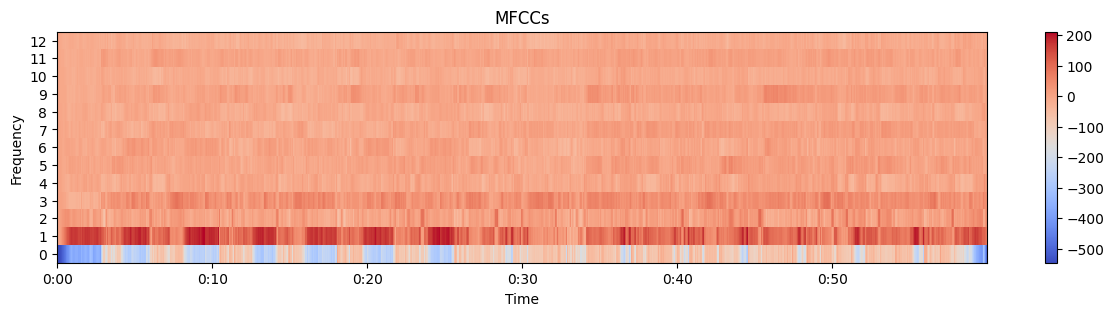

In [24]:
# ====== MFCCs ======
MFCCs = librosa.feature.mfcc(signal, hop_length=hop_length, n_fft=n_fft, n_mfcc=13)

#plot
fig = plt.figure(figsize=(15,3))
librosa.display.specshow(MFCCs, sr=sr, hop_length=hop_length, x_axis="time")
plt.title("MFCCs")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.yticks([12,11,10,9,8,7,6,5,4,3,2,1,0])
plt.colorbar()
plt.show()

